## Data Handling

This notebook intends to do four main tasks for the current project that set the scene for training our demo deep learning model: <p>
1.   Data collection
2.   Data analysis
3.   Data cleaning
4.   Data indexing

### Notebook setup

In [8]:

# Standard built-in modules
import os
import random
import shutil
import warnings

# Third-party modules
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread

# Configurations
warnings.filterwarnings("ignore") 
root_path = os.path.dirname(os.path.abspath(''))

### Data collection

We will work with a public Chest X-Ray (CXR) dataset that contains images for normal and pneumonia patients. The original dataset is found here, but we already moved that data to a Google Drive location to speed up the download process. That is the source from where you will download the data in the following cell.

In [2]:
# We will download a public dataset of CXRs with two classes (CXRs showing)
# pneumonia, and normal CXRs) which are already split into training and test
# sets. The dataset can be downloaded from here: https://bit.ly/3K31uV2

def download_data():
    """Download the CXR dataset required for running a dummy training.
    """
    print('Starting to download the data!')
    if not os.path.isdir(f'..{os.path.sep}data'):
        print('Starting to download the dataset!')
        download_url = "https://bit.ly/3K31uV2"
        download_path = "data.zip"
        gdown.download(download_url, download_path, quiet=False)
        os.system(f"unzip -q {download_path}")
        os.remove(f'{download_path}')
        shutil.rmtree('__MACOSX')
        os.rename('chest_xray', 'data')
        shutil.move('data', root_path)
        print('The dataset was downloaded successfully!')
    else:
        print('The CXR dataset was located.')

Now we can collect the paths to images available in this downloaded dataset. Fortunately, the original folder has the data split into training and test sets and also labeled based on their classes (i.e., normal vs. pneumonia). We will use the same data organization for the sake of this notebook. The following two cells will save the paths to images into two different Python lists (one for the training set and one for the test set), along with their labels, either normal or pneumonia. 

In [10]:
def collect_imageinfo_list() -> list: 
    """Return a list of information tuples for all images, where each 
    information tuple includes the associated path, label, and set for each 
    image.
    
    Returns:
        imageinfo_list (List): a list of (file_path, file_label, file_set) 
            for each image file.
    """
    imageinfo_list = list()
    for root, _, files in os.walk(f'{root_path}{os.path.sep}data'):
        for file in files:
            if file.lower().endswith('.jpeg') or file.lower().endswith('.jpg'):
                file_path = os.path.join(root, file)
                dir_path = os.path.dirname(file_path)
                file_label = dir_path.split('/')[-1]
                file_set = os.path.dirname(dir_path).split('/')[-1]
                imageinfo_list.append((file_path, file_label, file_set))
    
    return imageinfo_list

In [11]:
imageinfo_list = collect_imageinfo_list()

train_imageinfo_list = [imageinfo for imageinfo in imageinfo_list 
                        if imageinfo[2]=='train']
train_pneumonia_count = len([imageinfo for imageinfo in train_imageinfo_list 
                             if imageinfo[1]=='PNEUMONIA'])
train_normal_count = len([imageinfo for imageinfo in train_imageinfo_list 
                          if imageinfo[1]=='NORMAL'])
test_imageinfo_list = [imageinfo for imageinfo in imageinfo_list 
                       if imageinfo[2]=='test']
test_pneumonia_count = len([imageinfo for imageinfo in test_imageinfo_list 
                            if imageinfo[1]=='PNEUMONIA'])
test_normal_count = len([imageinfo for imageinfo in test_imageinfo_list 
                         if imageinfo[1]=='NORMAL'])

print(f'Number of images in the training set: {len(train_imageinfo_list)} --> \
Pneumonia: {train_pneumonia_count} - Normal: {train_normal_count}')
print(f'Number of images in the test set: {len(test_imageinfo_list)} --> \
Pneumonia: {test_pneumonia_count} - Normal: {test_normal_count}')

Number of images in the training set: 5232 --> Pneumonia: 3883 - Normal: 1349
Number of images in the test set: 624 --> Pneumonia: 390 - Normal: 234


### Data analysis

It is always a good idea to look at your data before applying training, as there can often be 'surprises'. First, we can visualize some random images from the data to see how they look. The following cell will visualize nine random images and their associated labels.

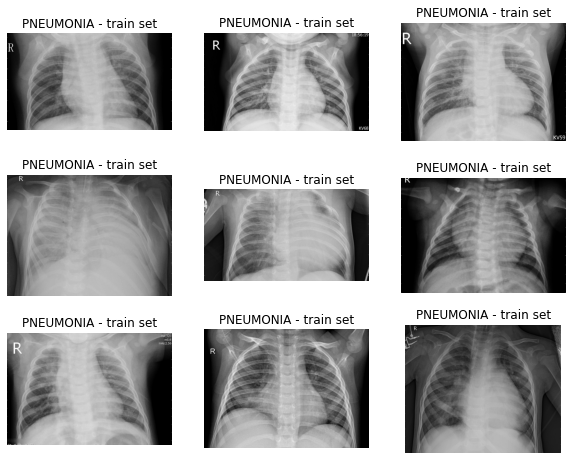

In [12]:
# Plotting sample images from the original data

def plot_sample_images():
  """
  Plot 9 sample images from the imaging dataset, while printing their 
  associated labels and sets.
  """
  _, axes = plt.subplots(3, 3, figsize=(10, 8))
  random_imagesinfo_items = random.choices(imageinfo_list, k=9)
  for i, imageinfo in enumerate(random_imagesinfo_items):
    image = imread(imageinfo[0])
    axes[i//3, i%3].imshow(image, cmap='gray')
    axes[i//3, i%3].axis('off')
    axes[i//3, i%3].set_title(f'{imageinfo[1]} - {imageinfo[2]} set')
  plt.show()

plot_sample_images()

Another routine step in exploring the data before proceeding to do any training is to investigate the size and dimension of images in our dataset. Before doing this, let's review what we mean by "size" and "dimension" from our previous chapters. 

Suppose the NumPy array we load for an image has the shape of (400, 500, 3). In this example, the height (Y dimension) of the image is 400 pixels, the width (X dimension) of that would be 500 pixels, and the image has three channels, and in this case we have 3 because the image has been saved as RGB (Red, Green, Blue). 

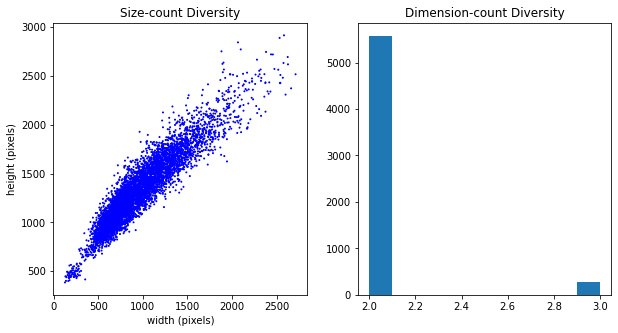

In [8]:
def investigate_image_arrays():
  """
  Plot the size-count and dimension-count diversity plots for image arrays.
  """
  image_arrayshape_list = [imread(imageinfo[0]).shape 
                           for imageinfo in imageinfo_list]
  image_size_list = [(shape[0], shape[1]) for shape in image_arrayshape_list]
  image_dimcount_list = [len(shape) for shape in image_arrayshape_list]
  image_size_set = set(image_size_list)
  unique_rows = [size[0] for size in image_size_set],
  unique_columns = [size[1] for size in image_size_set],
  unique_size_counts = [image_size_list.count(size) for size in image_size_set]
  # Plotting:
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  axes[0].scatter(x=unique_rows, y=unique_columns, 
                  s=unique_size_counts, c='blue')
  axes[0].set_title('Size-count Diversity')
  axes[0].set_xlabel('width (pixels)')
  axes[0].set_ylabel('height (pixels)')
  axes[1].hist(image_dimcount_list);
  axes[1].set_title('Dimension-count Diversity');

investigate_image_arrays()

### Data cleaning

For this demo project, no data cleaning was needed!

### Data indexing

Here, we create and save a dataframe from the paths, sets, and labels of our images. 

In [13]:
data_index = pd.DataFrame(imageinfo_list, columns=['file_path', 'file_label', 'file_set'])
data_index.head()

,file_path,file_label,file_set
0,/research/projects/m221279_Pouria/Playground/P...,PNEUMONIA,test
1,/research/projects/m221279_Pouria/Playground/P...,PNEUMONIA,test
2,/research/projects/m221279_Pouria/Playground/P...,PNEUMONIA,test
3,/research/projects/m221279_Pouria/Playground/P...,PNEUMONIA,test
4,/research/projects/m221279_Pouria/Playground/P...,PNEUMONIA,test


In [14]:
# we now save this dataframe to a csv file in the data directory.
data_index.to_csv(f'..{os.path.sep}data{os.path.sep}data_index.csv')